# Ecuación de Transporte de Calor

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

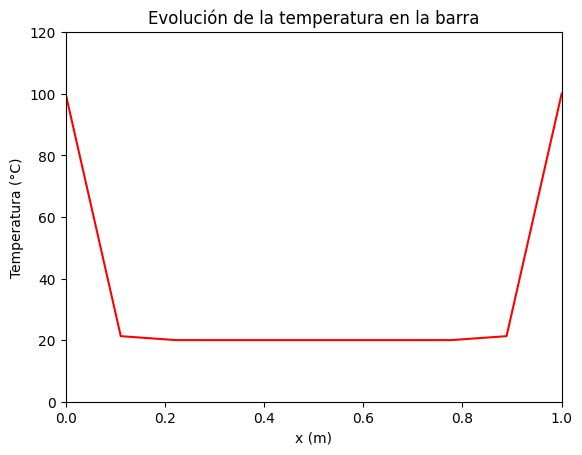

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Parámetros del problema
L = 1.0  # Longitud de la barra en metros
Nx = 10  # Número de puntos espaciales
dx = L / (Nx - 1)  # Paso espacial
alpha = 0.01  # Difusividad térmica
dt = 0.01  # Paso temporal
Nt = 1000  # Número de pasos temporales
lambda_ = alpha * dt / dx**2  # Parámetro lambda

# Verificamos que la condición de estabilidad de Fourier se cumple
if lambda_ > 0.5:
    raise ValueError("Lambda debe ser <= 0.5 para estabilidad")

# Inicialización de la temperatura
T = np.ones(Nx) * 20  # Temperatura inicial en toda la barra
T[0] = 100  # Condición de borde izquierda
T[-1] = 100  # Condición de borde derecha

# Configuración de la figura
fig, ax = plt.subplots()
x = np.linspace(0, L, Nx)
line, = ax.plot(x, T, color="red")

ax.set_xlim(0, L)
ax.set_ylim(0, 120)
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperatura (°C)")
ax.set_title("Evolución de la temperatura en la barra")

# Función de actualización para la animación
def update(frame):
    global T
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = lambda_ * T[i + 1] + (1 - 2 * lambda_) * T[i] + lambda_ * T[i - 1]
    T = T_new
    line.set_ydata(T)
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=Nt, interval=30, blit=True)

# Guardar la animación en video con FFmpeg
writer = FFMpegWriter(fps=30, bitrate=1800)
ani.save("difusion_calor.mp4", writer=writer)

print("Video guardado como 'difusion_calor.mp4'")
plt.show()
